In [1]:
# calculate kiwifruit 's each parts' mua, mus, with equal scale enlarge
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
# import tensorflow as tf
import math
# from scipy.optimize import fsolve
# from scipy.optimize import root
import scipy as scipy
from scipy.optimize import minimize
# from scipy import signal
# from scipy import linalg
# import scipy as scp
# import sympy as  syp
# from tensorflow.keras import backend as K
# from tensorflow.keras.layers import Layer
# from tensorflow.keras.models import Sequential

In [2]:
class process_hyperspec(object):
    
    def __init__(self, path, scat):
        self.path = path
        self.scat = scat
        
    def read_data(self):
        ## Read data from txt
        data=pd.read_fwf(self.path, dtype = object, header = None)## Read data as Pandas DataFrame
        data_8 = data.loc[8,:].str[6:] ## Select data of column of wavelengths

        data_nm_dataframe =pd.read_csv(StringIO(data_8[0]))

        with open(self.path,'r',encoding='utf-8') as f:
            content = f.read()

        flag = 0
        for index in range(len(content)):##find the start point  of time and intensity data, pointer is the 'index'
            if (content[index] == '\n') and (flag != 9):
                flag = flag + 1
            elif (content[index] == '\n') and (flag == 9):
                break
            else:
                continue

        data_ns = pd.read_csv(StringIO(content[index:len(content)]), names = data_nm_dataframe.columns[0:len(set(data_nm_dataframe))]) ## Read data of time and gray 
        img_nm_ns = np.array(data_ns)    ## Transform to numpy array                                image as DataFrame; names is a 640x0 array indicates the wavelengths range
        
        self.data_frame = data_ns
        self.data_array = img_nm_ns
        
    def cal_846nm(self):
        time_total, wavelength_total = self.data_array.shape ## Generate an array contains intensity versus time data on 846nm
        data_846nm = np.zeros((time_total,), dtype = float )

        for i in range(wavelength_total):
            data_846nm = self.data_array[:,i] + data_846nm

        return data_846nm/wavelength_total
    
    def return_dataframe(self):
        
        return self.data_frame
    
    def return_array(self):
        return self.data_array

In [54]:
#0: '../20221228/kiwi_irf.txt',
dict0 = {0: '../20221228/kiwi_irf.txt',1: '../20221228/kiwi01_thick.txt',2: '../20221228/kiwi02_thick.txt',3: '../20221228/kiwi03_thick.txt',
         4: '../20221228/kiwi04_thick.txt',}
dict1 = {0: '../20221228/kiwi01_irf.txt',1: '../20221228/kiwi02_irf.txt',2: '../20221228/kiwi04_irf.txt',3: '../20221228/kiwi04_irf.txt',}
dict2 = {0: '../20221228/kiwi01_pericarp.txt',1: '../20221228/kiwi02_pericarp.txt',2: '../20221228/kiwi03_pericarp.txt',3: '../20221228/kiwi04_pericarp.txt',}
dict3 = {0: '../20221228/kiwi01_pulp.txt',1: '../20221228/kiwi02_pulp.txt', 2: '../20221228/kiwi03_pulp.txt',3: '../20221228/kiwi04_pulp.txt'}
dict4 = {0: '../20221228/kiwi01_seeds.txt',1: '../20221228/kiwi02_seeds.txt',2: '../20221228/kiwi03_seeds.txt',3: '../20221228/kiwi04_seeds.txt',}
dict5 = {0: '../20221228/kiwi01_kernel.txt',1: '../20221228/kiwi02_kernel.txt',2: '../20221228/kiwi03_kernel.txt',3: '../20221228/kiwi04_kernel1.txt',}
di = [dict1,dict2,dict3,dict4,dict5]

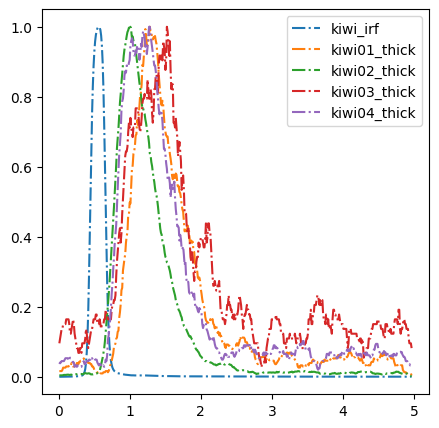

In [67]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


N = 5
dict_n = 'dict0'
scat = [None]*N
data_480multi9 = np.zeros((N,480), dtype = float)
time_index = np.zeros((N,480))
for i in range(0,N):
    scat[i] = process_hyperspec(eval(dict_n)[i], i)
    scat[i].read_data()
    data_480multi9[i,:] = scat[i].cal_846nm()
    time_index[i] = scat[i].return_dataframe().index
##############################################
str0 = '['
for i in range(N):
    str0 = str0 +'line['+str(i)+'],'

str0 = str0[0:-1]
str0 = str0+']'
#########################################
str1 = '['
for i in range(N):
    str1 = str1 + '\''+eval(dict_n)[i][12:-4]+'\''+','

str1 = str1+']'
###############################################
line = [None]*N
plt.figure(figsize = (5,5))
for i in range(0,N):
    data_480multi9[i,:] = smooth(data_480multi9[i,:],20)
    line[i], = plt.plot(time_index[i],data_480multi9[i,:]/max(abs(data_480multi9[i,:])) , '-.')

plt.legend(handles=eval(str0)
           ,labels=eval(str1),loc='best')

plt.show()
    

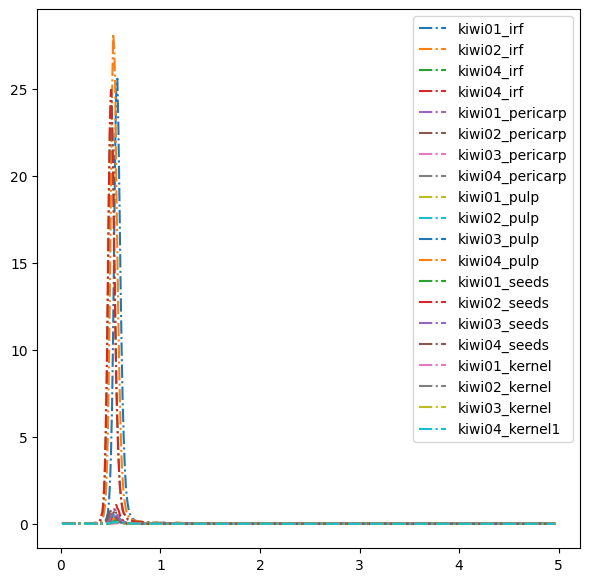

In [55]:
N = 4*5
scat = [None]*N
data_480multi9 = np.zeros((5,4,480), dtype = float)
time_index = np.zeros((5,4,480))
for i in range(5):
    for j in range(4):
        scat[i*4+j] = process_hyperspec(di[i][j], i)
        scat[i*4+j].read_data()
        data_480multi9[i,j,:] = scat[i*4+j].cal_846nm()
        time_index[i,j] = scat[i*4+j].return_dataframe().index
##############################################
str0 = '['
for i in range(N):
    str0 = str0 +'line['+str(i)+'],'

str0 = str0[0:-1]
str0 = str0+']'
#########################################
str1 = '['
for i in range(5):
    for j in range(4):
        str1 = str1 + '\''+di[i][j][12:-4]+'\''+','

str1 = str1+']'
###############################################
line = [None]*N
plt.figure(figsize = (7,7))
for i in range(0,5):
    for j in range(4):
        line[i*4+j], = plt.plot(time_index[i,j],data_480multi9[i,j,:],'-.')

plt.legend(handles=eval(str0)
           ,labels=eval(str1),loc='best')

plt.show()
    

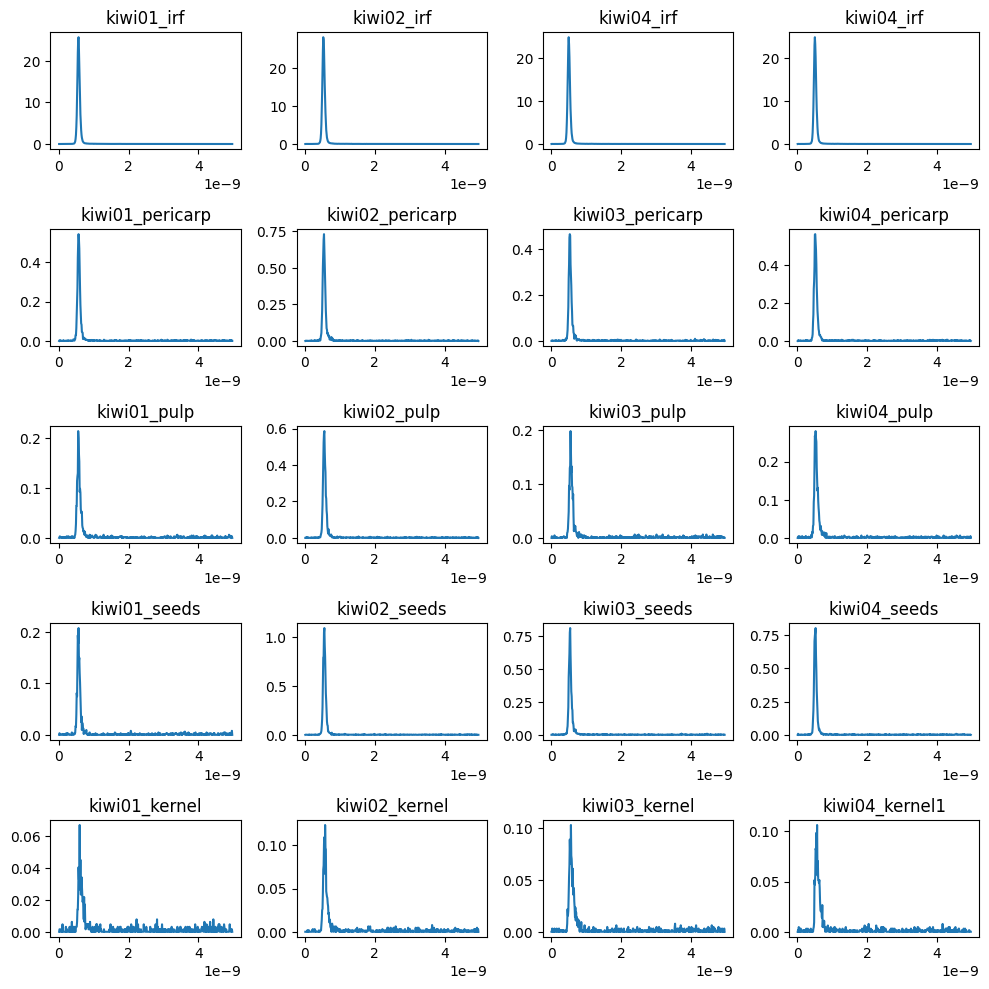

In [8]:
#######################################
# im1 = scat[1].return_array()
# timex,wavex = im1.shape
# print(timex,wavex)
# #ptw = np.zeros((wavex,))             # test how to get TRS signal, sum signal
                                         # in all wavelengths or just take 846nm
# ptw = np.sum(im1,0)
# print(ptw.shape)
# plt.plot(im1[:,np.argmax(ptw)])
# #plt.plot(data_480multi9[1,:])
# plt.show()
##########################################
fig = plt.figure(figsize = (10,10))
for i in range(5):
    for j in range(4):
        line[i*4+j] = plt.subplot(5,4,i*4+j+1)
        line[i*4+j].plot(time_index[i,j]*1e-9,data_480multi9[i,j,:])
        line[i*4+j].title.set_text(di[i][j][12:-4])
fig.tight_layout(pad=1.1)


plt.show()

In [10]:
data_intensity_extended = np.zeros((5,4, 959), dtype = float)
data_intensity_extended[:,:, 0:479]  = data_480multi9[:,:,0:479]

In [13]:
y =np.zeros((4,4,959))
h = np.zeros((4,480))
for i in range(4):
    for j in range(4):
            y[i,j,:] = data_intensity_extended[i+1,j,:]
            

# y[2:4,0] = y[0,0]/10
# y[1,0] = y[0,0]/5
for i in range(4):
    h[i] = data_480multi9[0,i]

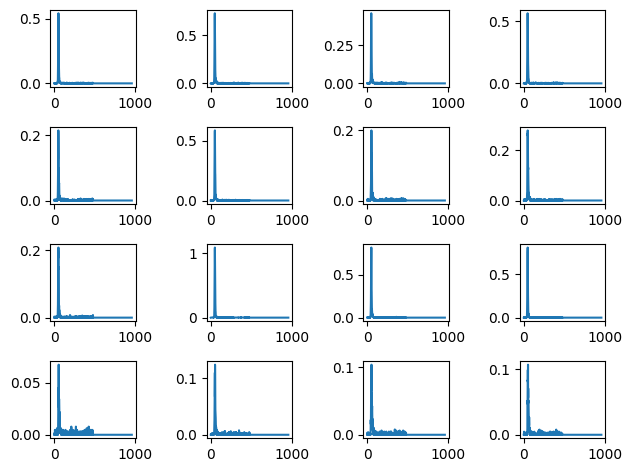

In [14]:
for i in range(4):
    for j in range(4):
        line[i] = plt.subplot(4,4,i*4+j+1)
        line[i].plot(y[i,j,:])
plt.tight_layout(pad=1.0)
plt.show()

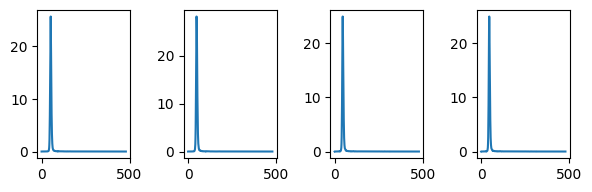

In [15]:
plt.figure(figsize = (6,2))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.plot(h[i])
plt.tight_layout(pad=1.0)
plt.show()

In [53]:
i,j = 3,3
print(np.argmax(h[j]))
print(np.argmax(y[i,j]))

46
52


In [17]:
class calculate_miu_s0(object):
    
    def __init__(self, h, y, time_index,d):
        self.h = h
        self.y = y
        self.time = time_index
        self.d = d
        return None
    
    def transmittance(self, d, t, c, g, miu_a, miu_s):
        miu_s_prime = (1-g)*miu_s
        Z0 = 1/(miu_s_prime)
        D = 1/(3*(miu_a + miu_s_prime))
        h1 = math.pow(4*math.pi*D*c, -0.5)
        h2 = math.pow(t, -1.5)*math.exp(-miu_a*c*t)
        h3 = (d-Z0)*math.exp(-(math.pow(d-Z0, 2))/(4*D*c*t))
        h4 = (d+Z0)*math.exp(-(math.pow(d+Z0, 2))/(4*D*c*t))
        h5 = (3*d-Z0)*math.exp(-(math.pow(3*d-Z0, 2))/(4*D*c*t))
        h6 = (3*d+Z0)*math.exp(-(math.pow(3*d+Z0, 2))/(4*D*c*t))
    #     return d,Z0,D,c,t
        return h1*h2*(h3-h4+h5-h6)
    
    
    def error_cal(self, x):
        #miu_a = x[0]
        miu_a = 69
        miu_s = x[0]
         
        # k = 0.1
        # miu_a = 0.01e2
        g = 0.85
        # d = 0.38e-3
        d = self.d
        c = 3e8/1.3314
        T = int(480)
#         time = np.array(range(1,T, 1))
#         time = time*1e-8*0.010345058455114822
        time = self.time*1e-9
        # miu_s = miu_s*1e4
        intensity1 = np.zeros((T, ), dtype = float)
        for i in range(time.shape[0] ):

            intensity1[i] = calculate_miu_s0.transmittance(self, d, time[i], c, g, miu_a, miu_s)
        
        y2 = np.convolve(intensity1, self.h)
        self.intensity = intensity1
        self.y_convolved = y2
        y2 = y2/max(abs(y2))
        y3 = self.y/max(abs(self.y))
        
        return np.sum(abs(y2 - y3))
#         return time

    def get_convolved_signal(self):
        return self.y_convolved
        
    def get_x(self):
        return self.intensity

In [16]:
i = 0
j = 0
d = 0.6e-3
bnds = ((0, None),)
m = calculate_miu_s0(h[i], y[i+1,j+1], time_index[(i+1)*2+j+1],d)
minu = minimize(m.error_cal, x0 = [1e2], method  = 'Nelder-Mead', bounds = bnds, options={"xtol" : 1e-20, "disp":True})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\533725806.py:65: OptimizeWarning: Unknown solver options: xtol
  minu = minimize(m.error_cal, x0 = [1e2], method  = 'Nelder-Mead', bounds = bnds, options={"xtol" : 1e-20, "disp":True})


TypeError: only size-1 arrays can be converted to Python scalars

In [67]:
minu

 final_simplex: (array([[3013.80508423],
       [3013.80500793]]), array([20.5896691, 20.5896691]))
           fun: 20.589669100600368
       message: 'Optimization terminated successfully.'
          nfev: 67
           nit: 33
        status: 0
       success: True
             x: array([3013.80508423])

In [35]:
class calculate_miu_s1(object):
    
    def __init__(self, h, y, time_index,d):
        self.h = h
        self.y = y
        self.time = time_index
        self.d = d
        return None
    
    def transmittance(self, d, t, c, g, miu_a, miu_s):
        miu_s_prime = (1-g)*miu_s
        Z0 = 1/(miu_s_prime)
        D = 1/(3*(miu_a + miu_s_prime))
        h1 = math.pow(4*math.pi*D*c, -0.5)
        h2 = math.pow(t, -1.5)*math.exp(-miu_a*c*t)
        h3 = (d-Z0)*math.exp(-(math.pow(d-Z0, 2))/(4*D*c*t))
        h4 = (d+Z0)*math.exp(-(math.pow(d+Z0, 2))/(4*D*c*t))
        h5 = (3*d-Z0)*math.exp(-(math.pow(3*d-Z0, 2))/(4*D*c*t))
        h6 = (3*d+Z0)*math.exp(-(math.pow(3*d+Z0, 2))/(4*D*c*t))
    #     return d,Z0,D,c,t
        return h1*h2*(h3-h4+h5-h6)
    
    
    def error_cal(self, x):
        miu_a = x[0]
        #miu_a = 69
        miu_s = x[1]
         
        # k = 0.1
        # miu_a = 0.01e2
        g = 0.85
        # d = 0.38e-3
        d = self.d
        c = 3e8/1.3314
        T = int(480)
#         time = np.array(range(1,T, 1))
#         time = time*1e-8*0.010345058455114822
        time = self.time*1e-9
        # miu_s = miu_s*1e4
        intensity1 = np.zeros((T, ), dtype = float)
        for i in range(time.shape[0] ):

            intensity1[i] = calculate_miu_s1.transmittance(self, d, time[i], c, g, miu_a, miu_s)
        
        h2 = self.h/max(abs(self.h))
        intensity1 = intensity1/max(abs(intensity1))
        y2 = np.convolve(intensity1, h2)
        self.intensity = intensity1
        self.y_convolved = y2
        y2 = y2/max(abs(y2))
        y3 = self.y/max(abs(self.y))
        
        return np.sum(abs(y2 - y3))
#         return time

    def get_convolved_signal(self):
        return self.y_convolved
        
    def get_x(self):
        return self.intensity

In [36]:
# %%capture --no-display
miu_s_get = np.zeros((4,4,2))
m1=[None]*4*4
fun_value = np.zeros((4,4))
d = np.array([[0.3,0.3,0.6,0.9],[5.1,4.2,6.4,7.1],[3.3,4.2,5.7,5.5],[6.3,6.5,5.5,6.0]])*1e-3
bnds = ((0, None), (0, None))
for i in range(4):
    for j in range(4):
        m1[i*4+j] = calculate_miu_s1(h[j], y[i,j], time_index[i,j],d[i,j])
        minu = minimize(m1[i*4+j].error_cal, x0 = [0.1e2,100e2], method  = 'Nelder-Mead', bounds = bnds, options={"xtol" : 1e-20, "disp":True})
        miu_s_get[i,j], fun_value[i,j] = minu.x, minu.fun # Nelder-Mead

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\1336129726.py:10: OptimizeWarning: Unknown solver options: xtol
  minu = minimize(m1[i*4+j].error_cal, x0 = [0.1e2,100e2], method  = 'Nelder-Mead', bounds = bnds, options={"xtol" : 1e-20, "disp":True})


Optimization terminated successfully.
         Current function value: 1.481702
         Iterations: 188
         Function evaluations: 356


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\1336129726.py:10: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  minu = minimize(m1[i*4+j].error_cal, x0 = [0.1e2,100e2], method  = 'Nelder-Mead', bounds = bnds, options={"xtol" : 1e-20, "disp":True})
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\947877452.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  Z0 = 1/(miu_s_prime)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\947877452.py:16: RuntimeWarning: invalid value encountered in double_scalars
  h3 = (d-Z0)*math.exp(-(math.pow(d-Z0, 2))/(4*D*c*t))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\947877452.py:17: RuntimeWarning: invalid value encountered in double_scalars
  h4 = (d+Z0)*math.exp(-(math.pow(d+Z0, 2))/(4*D*c*t))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\947877452.py:18: RuntimeWarning: invalid value encountered in double_scalars
  h5 = (3*d-Z0)*math.exp(-(math.pow(3*

Optimization terminated successfully.
         Current function value: 1.717892
         Iterations: 141
         Function evaluations: 271
Optimization terminated successfully.
         Current function value: 4.424104
         Iterations: 116
         Function evaluations: 220
Optimization terminated successfully.
         Current function value: 1.553420
         Iterations: 113
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 4.470007
         Iterations: 150
         Function evaluations: 288
Optimization terminated successfully.
         Current function value: 3.393026
         Iterations: 87
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 3.710180
         Iterations: 136
         Function evaluations: 265


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17280\947877452.py:46: RuntimeWarning: invalid value encountered in divide
  intensity1 = intensity1/max(abs(intensity1))


Optimization terminated successfully.
         Current function value: 1.832886
         Iterations: 76
         Function evaluations: 193
Optimization terminated successfully.
         Current function value: 1.252531
         Iterations: 201
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 10.816611
         Iterations: 67
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 5.828984
         Iterations: 93
         Function evaluations: 171
Optimization terminated successfully.
         Current function value: 7.283656
         Iterations: 85
         Function evaluations: 158
Optimization terminated successfully.
         Current function value: 6.986888
         Iterations: 81
         Function evaluations: 156


In [37]:
miu_s_get/1e2

array([[[4.50410816e+00, 1.11456624e+04],
        [3.73497527e+01, 1.07007787e+05],
        [1.74436080e+01, 4.55207740e+04],
        [7.73891394e-01, 1.06421867e+03]],

       [[2.20472874e+00, 1.70335507e+01],
        [5.26920178e+00, 1.71987057e+02],
        [3.56213255e+00, 1.96715645e+02],
        [1.69374535e-01, 2.98437013e+01]],

       [[4.00484667e+00, 2.74312073e+01],
        [1.55827783e+02, 4.33096648e+03],
        [4.26390384e+02, 6.46927453e+03],
        [1.73161939e+01, 4.37199610e+01]],

       [[1.36661489e-01, 5.05649109e+01],
        [4.48358473e-01, 4.98249974e+01],
        [2.42217061e-01, 1.02997934e+02],
        [1.05372496e-01, 7.53251270e+01]]])

In [38]:
# %%capture --no-display
yk0 = np.zeros((4,4,959))
for i in range(3):
    yk0[i,j] = m1[i*4+j].get_convolved_signal()

59.25045756638819
[[ 1.48170207  1.40715996  1.95802134  1.71789164]
 [ 4.42410364  1.55341976  4.47000682  3.3930259 ]
 [ 3.71018012  1.1333905   1.83288596  1.25253083]
 [10.81661144  5.82898385  7.28365572  6.98688801]]


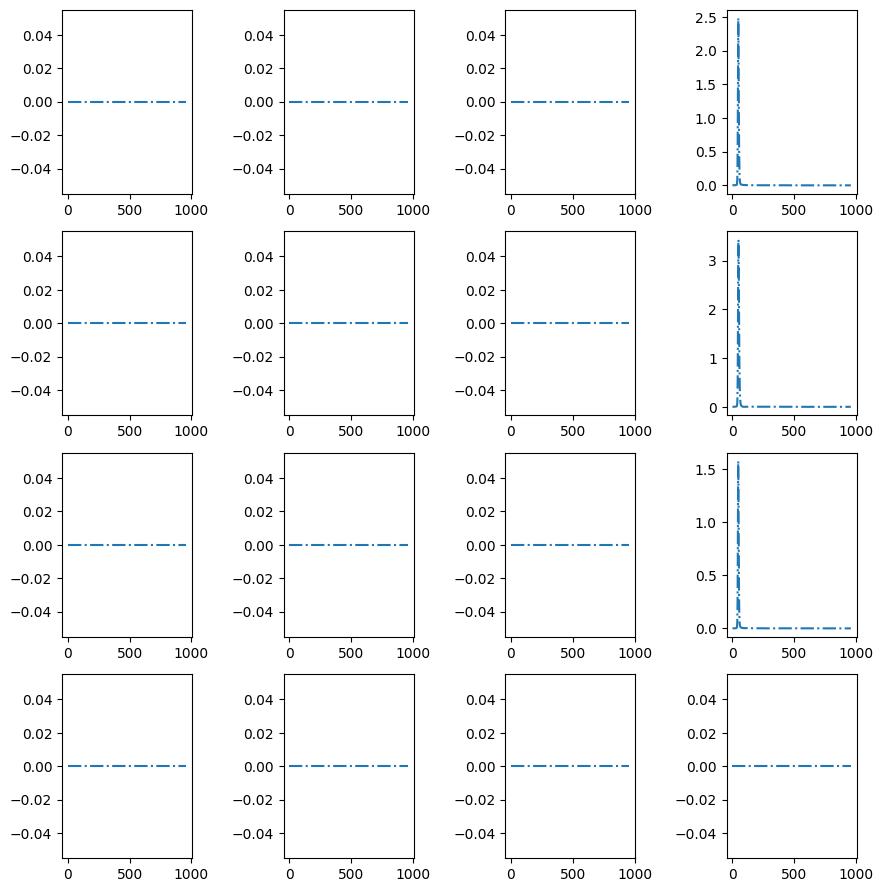

In [39]:
print(np.sum(abs(fun_value)))
print(fun_value)
plt.figure(figsize = (9,9))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1 )
        # plt.plot(y[i,j,:]/max(abs(y[i,j,:])),'-.')
        # plt.plot(yk0[i,j]/max(abs(yk0[i,j])),'-.')
        plt.plot(yk0[i,j],'-.')
plt.tight_layout(pad=1.0)
plt.show()